In [1]:
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd

anchor = np.array([[0,       0],
                    [5.95,    0],
                    [0,    5.84],
                    [5.95, 5.84]])

num_anchor = 4

fingerprint = pd.read_csv('fingerprint_db.csv')

# print(fingerprint)
coords = fingerprint[['x', 'y']]
coords.head()

,x,y
0,0.545,0.19
1,0.545,1.19
2,0.545,2.19
3,0.545,3.19
4,0.545,4.19


In [2]:
dis = np.sqrt(coords['x'] **2 + coords['y']**2)
log10_dis = np.log10(dis)
log10_dis_ref = np.array([log10_dis - log10_dis[0]])
rssi = fingerprint['RSSI3'].to_numpy()
rssi_ref = np.array([rssi - rssi[0]])
# log10_dis.head()
print(rssi_ref[0])

[  0.           6.5927207    5.29858981  -2.82737972   2.37488049
 -20.17441464  -2.69837856  -3.48475651  -5.19328011 -11.31140876
 -10.49526259  -4.80919891  -9.41153407  -1.47537088  -3.32947483
  -5.5930091   -5.72730342  -5.48391644  -0.27772455  -5.49494496
   2.06407421 -11.09756391  -1.16288178  -5.38503638  -4.66925608
 -16.90179381 -13.52884942  -7.79734896  -8.13251622  -9.32833488
 -15.87604231  -9.06159743  -5.48296265]


In [3]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression(fit_intercept=True).fit( rssi.reshape(-1,1), log10_dis_ref.T)


In [4]:
coef = reg.coef_
print(reg.predict([[0]]))
print(1/coef)

[[-0.64556871]]
[[-48.68481117]]


[[-0.64556871 -0.64556871 -0.64556871 -0.64556871 -0.64556871 -0.64556871
  -0.64556871 -0.64556871 -0.64556871 -0.64556871 -0.64556871 -0.64556871
  -0.64556871 -0.64556871 -0.64556871 -0.64556871 -0.64556871 -0.64556871
  -0.64556871 -0.64556871 -0.64556871 -0.64556871 -0.64556871 -0.64556871
  -0.64556871 -0.64556871 -0.64556871 -0.64556871 -0.64556871 -0.64556871
  -0.64556871 -0.64556871 -0.64556871]]


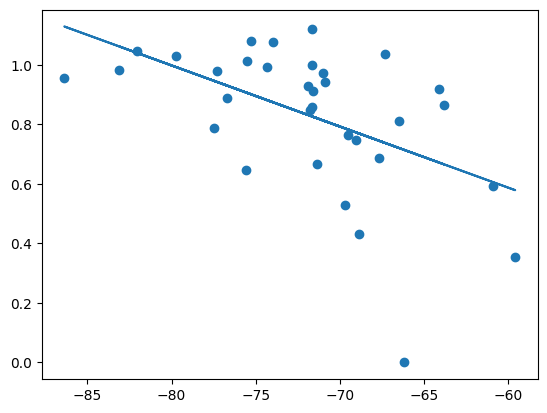

In [5]:
import matplotlib.pyplot as plt

y_predict = np.zeros((1,33))
for i in range(33):
    y_predict[0,i] = reg.predict(np.reshape(rssi[i], (-1, 1)))
plt.subplot()
plt.scatter( rssi, log10_dis_ref)
plt.plot(rssi, y_predict[0,:])
print(y_predict - coef * rssi)

plt.show()

In [6]:
log10_dis_pred = reg.predict([[-71]])
dis_pred = np.power(log10_dis_pred, 10) * dis[0]
print(dis_pred)
print(rssi[32])

[[0.07262666]]
-71.67857142857143


In [7]:
import pickle

In [8]:
with open('pathloss_model.pkl', 'wb') as file:
    pickle.dump(reg, file)